
#  SmartTarget: AI-Driven Insurance Sales Prediction 

### **Customer Conversion Prediction**

# Introduction


Project aims to predict customer conversion for an insurane company. Using historical data of the list of customers telecalled by sales team of the insurance company, a machine learning model is developed that can identify which type of customers are more likely to avail an insurance

The project aims to help the insurance company identify the customers that are most likely to convert, so that they can be targeted via call and the cost of telephonic marketing campaigns can be reduced.

In [4]:
#Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load the dataset
customer_dt = pd.read_csv('Data.csv')

In [6]:
customer_dt

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [7]:
customer_dt.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [8]:
customer_dt.shape

(45211, 11)

In [9]:
customer_dt.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [10]:
customer_dt.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [11]:
customer_dt.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [12]:
#checking for the data is balanced or not
customer_dt['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [13]:
len(customer_dt)

45211

In [14]:
# Calculate the value counts for each class
value_counts = customer_dt['y'].value_counts()

# Calculate the percentage for each class
percentage = value_counts / len(customer_dt) * 100

# Display the percentage
print(percentage)

y
no     88.30152
yes    11.69848
Name: count, dtype: float64


### Finding Duplicate values

In [15]:
customer_dt.duplicated().sum()

6

In [16]:
# We will remove duplicate values

customer_dt = customer_dt.drop_duplicates()

In [17]:
# Again check the how many duplicate values

customer_dt.duplicated().sum()

0

In [18]:
customer_dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.1+ MB


### **Unique values of categorical columns of the dataset**

In [19]:
# Loop through each column in the DataFrame
for column in customer_dt.columns:
    # Check if the column is of object type (categorical)
    if customer_dt[column].dtype == 'object':
        # Print the unique values for the categorical column
        print(f"Unique values in '{column}': {customer_dt[column].unique()}")
        print("-" * 50)

Unique values in 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
--------------------------------------------------
Unique values in 'marital': ['married' 'single' 'divorced']
--------------------------------------------------
Unique values in 'education_qual': ['tertiary' 'secondary' 'unknown' 'primary']
--------------------------------------------------
Unique values in 'call_type': ['unknown' 'cellular' 'telephone']
--------------------------------------------------
Unique values in 'mon': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
--------------------------------------------------
Unique values in 'prev_outcome': ['unknown' 'failure' 'other' 'success']
--------------------------------------------------
Unique values in 'y': ['no' 'yes']
--------------------------------------------------


## **Explore this dataset and replace unknown values**


In dataset there are many unknown values in different categorial variables we will check first and remove if it's not too much

In [20]:
customer_dt.job.value_counts()

job
blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [21]:
len(customer_dt)

45205

**So 288 values are unknown in job variable of dataset out of 45205 rows, deletion of 288 rows will not get more impact on dataset .**

In [22]:
#replacing unknown value as null
customer_dt.loc[customer_dt['job'] == 'unknown', 'job'] = np.nan

In [23]:
customer_dt.isnull().sum()

age                 0
job               288
marital             0
education_qual      0
call_type           0
day                 0
mon                 0
dur                 0
num_calls           0
prev_outcome        0
y                   0
dtype: int64

In [24]:
customer_dt = customer_dt.dropna(subset = ['job'])

In [25]:
customer_dt.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [26]:
len(customer_dt)

44917

In [27]:
customer_dt.education_qual.value_counts()

education_qual
secondary    23128
tertiary     13260
primary       6799
unknown       1730
Name: count, dtype: int64

In [28]:
# Calculate the total number of entries in the education_qual column
total_entries = customer_dt['education_qual'].count()

# Calculate the number of 'unknown' entries in the education_qual column
unknown_count = customer_dt['education_qual'].value_counts()['unknown']

# Calculate the percentage of 'unknown' values
unknown_percentage = (unknown_count / total_entries) * 100

# Print the result
print(f"Percentage of 'unknown' in education_qual: {unknown_percentage:.2f}%")

Percentage of 'unknown' in education_qual: 3.85%


**So percentage of unknown in education_qual 3.85% so we will remove unknown as it will not effect the dataset .**

In [29]:
len(customer_dt)

44917

In [30]:
# Remove rows where 'education_qual' is 'unknown'
customer_dt = customer_dt[customer_dt['education_qual'] != 'unknown']

In [31]:
len(customer_dt)

43187

In [32]:
customer_dt.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [33]:
customer_dt.call_type.value_counts()

call_type
cellular     28210
unknown      12283
telephone     2694
Name: count, dtype: int64

In [34]:
# Calculate the total number of entries in the call_type column
total_entries_cl = customer_dt['call_type'].count()

# Calculate the number of 'unknown' entries in the call_type column
unknown_count_cl = customer_dt['call_type'].value_counts()['unknown']

# Calculate the percentage of 'unknown' values
unknown_percentage_cl = (unknown_count_cl / total_entries_cl) * 100

# Print the result
print(f"Percentage of 'unknown' in call_type: {unknown_percentage_cl:.2f}%")

Percentage of 'unknown' in call_type: 28.44%


**So percentage of unknown in call_type is  28.44, we will keep as it is .**

In [35]:
customer_dt.prev_outcome.value_counts()

prev_outcome
unknown    35280
failure     4709
other       1774
success     1424
Name: count, dtype: int64

In [36]:
# Calculate the total number of entries in the prev_outcome column
total_entries_pr = customer_dt['prev_outcome'].count()

# Calculate the number of 'unknown' entries in the prev_outcome column
unknown_count_pr = customer_dt['prev_outcome'].value_counts()['unknown']

# Calculate the percentage of 'unknown' values
unknown_percentage_pr = (unknown_count_pr / total_entries_pr) * 100

# Print the result
print(f"Percentage of 'unknown' in prev_outcome: {unknown_percentage_pr:.2f}%")

Percentage of 'unknown' in prev_outcome: 81.69%


**So percentage of unknown in prev_outcome is  81.69, we will keep as it is .**

## **Outlier Detection and Removal**

We will check the outliers by plotting box plots and remove by IQR method

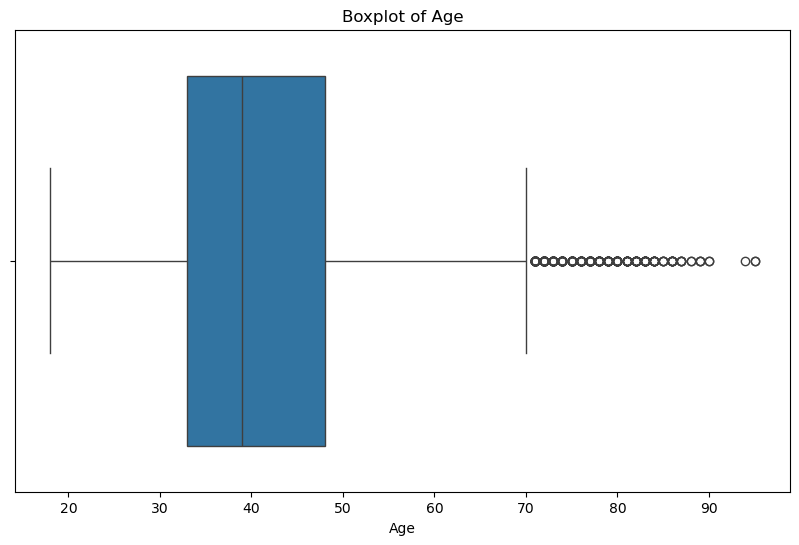

In [37]:
# Show the boxplot of age
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_dt['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [38]:
# Calculate the IQR for age
Q1_g = customer_dt['age'].quantile(0.25)
Q3_g = customer_dt['age'].quantile(0.75)
IQR_g = Q3_g - Q1_g

# Determine the lower and upper bounds for outliers
lower_bound_g = Q1_g - 1.5 * IQR_g
upper_bound_g = Q3_g + 1.5 * IQR_g

print(f"Lower Bound of age column: {lower_bound_g}")
print(f"Upper Bound of age column: {upper_bound_g}")

# Identify outliers
outliers_g = customer_dt[(customer_dt['age'] < lower_bound_g) | (customer_dt['age'] > upper_bound_g)]


# Count the number of outliers
num_outliers_g = outliers_g.shape[0]
print(f"Number of outliers in the 'age' column: {num_outliers_g}")


Lower Bound of age column: 10.5
Upper Bound of age column: 70.5
Number of outliers in the 'age' column: 434


checking after outliers removal in age Column

In [39]:
outliers_g

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
29158,83,retired,married,primary,telephone,2,feb,912,1,unknown,no
29261,75,retired,divorced,primary,cellular,2,feb,294,1,unknown,no
29263,75,retired,married,primary,cellular,2,feb,149,1,unknown,no
29322,83,retired,married,tertiary,cellular,2,feb,283,2,unknown,no
29865,75,retired,divorced,primary,cellular,4,feb,136,3,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...
45163,71,retired,married,secondary,cellular,9,nov,379,2,failure,no
45191,75,retired,divorced,tertiary,cellular,16,nov,262,1,failure,yes
45204,73,retired,married,secondary,cellular,17,nov,300,1,failure,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes


In [40]:
customer_dt = customer_dt[(customer_dt['age'] >= lower_bound_g) & (customer_dt['age'] <= upper_bound_g)]

In [41]:
customer_dt.shape

(42753, 11)

Again check the boxplot of age

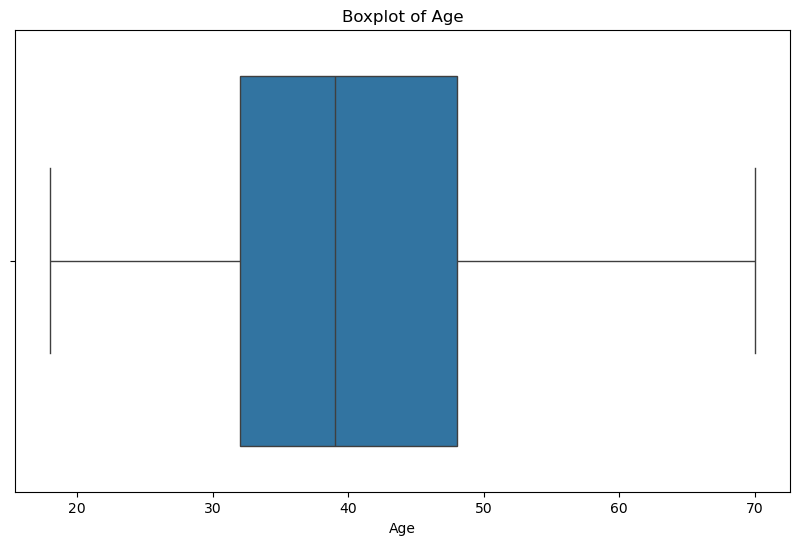

In [42]:
# Show the boxplot of age
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_dt['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

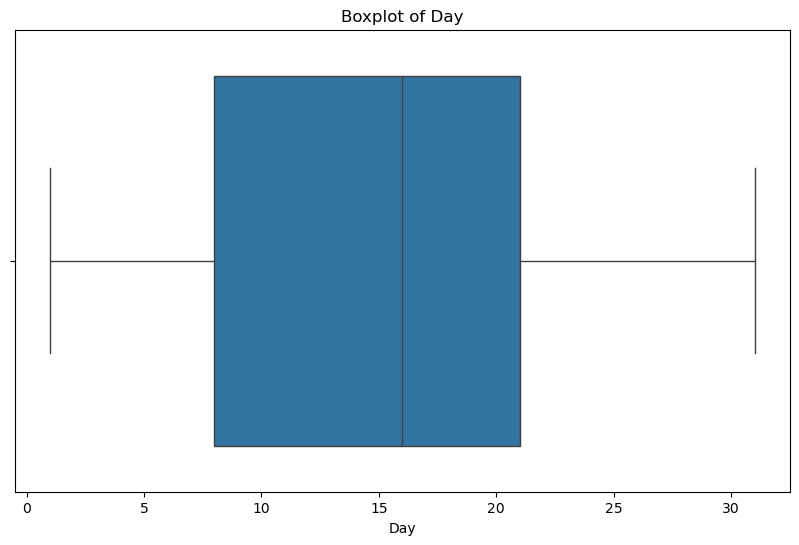

In [43]:
# Show the boxplot of day
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_dt['day'])
plt.title('Boxplot of Day')
plt.xlabel('Day')
plt.show()

So from above graph it's clearly shows that there is no outlier in day column

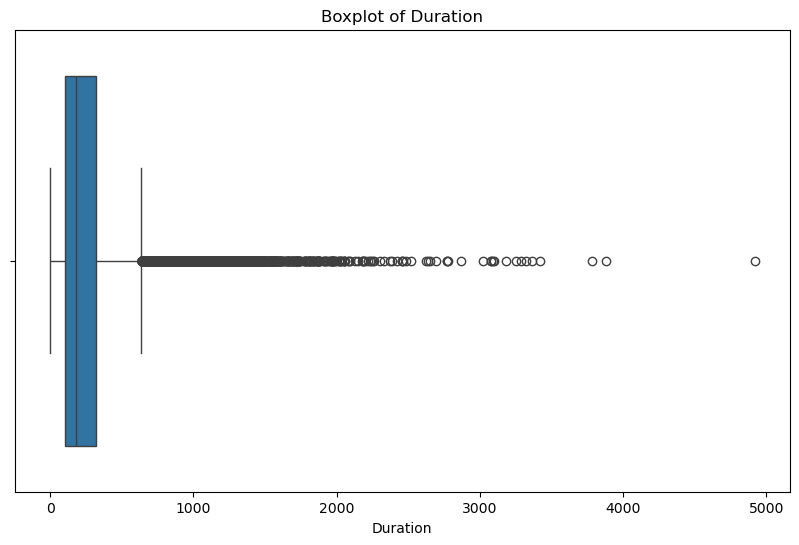

In [44]:
# Show the boxplot of dur
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_dt['dur'])
plt.title('Boxplot of Duration')
plt.xlabel('Duration')
plt.show()

In [45]:
# Calculate the IQR for duration
Q1_dur = customer_dt['dur'].quantile(0.25)
Q3_dur = customer_dt['dur'].quantile(0.75)
IQR_dur = Q3_dur - Q1_dur

# Determine the lower and upper bounds for outliers
lower_bound_dur = Q1_dur - 1.5 * IQR_dur
upper_bound_dur = Q3_dur + 1.5 * IQR_dur



# Identify outliers
outliers_dur = customer_dt[(customer_dt['dur'] < lower_bound_dur) | (customer_dt['dur'] > upper_bound_dur)]


# Count the number of outliers
num_outliers_dur = outliers_dur.shape[0]
print(f"Number of outliers in the 'durarion' column: {num_outliers_dur}")

Number of outliers in the 'durarion' column: 3093


In [46]:
outliers_dur

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
37,53,technician,married,secondary,unknown,5,may,1666,1,unknown,no
43,54,retired,married,secondary,unknown,5,may,1492,1,unknown,no
53,42,admin.,single,secondary,unknown,5,may,787,1,unknown,no
59,46,services,married,primary,unknown,5,may,1778,1,unknown,no
61,53,technician,divorced,secondary,unknown,5,may,812,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45085,25,technician,single,secondary,cellular,22,oct,716,3,unknown,yes
45124,27,blue-collar,single,primary,cellular,26,oct,701,2,unknown,yes
45199,34,blue-collar,single,secondary,cellular,16,nov,1166,3,other,no
45200,38,technician,married,secondary,cellular,16,nov,1556,4,unknown,yes


In [47]:
customer_dt = customer_dt[(customer_dt['dur'] >= lower_bound_dur) & (customer_dt['dur'] <= upper_bound_dur)]

In [48]:
customer_dt.shape

(39660, 11)

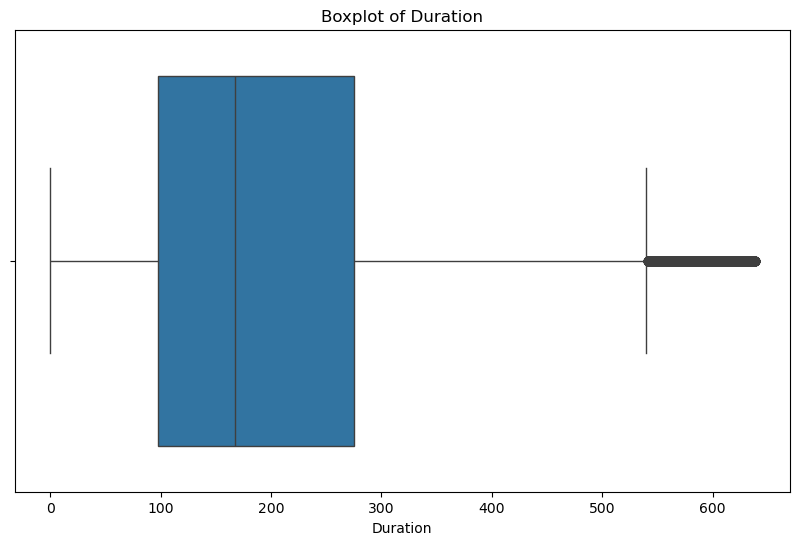

In [49]:
# Show the boxplot of dur
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_dt['dur'])
plt.title('Boxplot of Duration')
plt.xlabel('Duration')
plt.show()

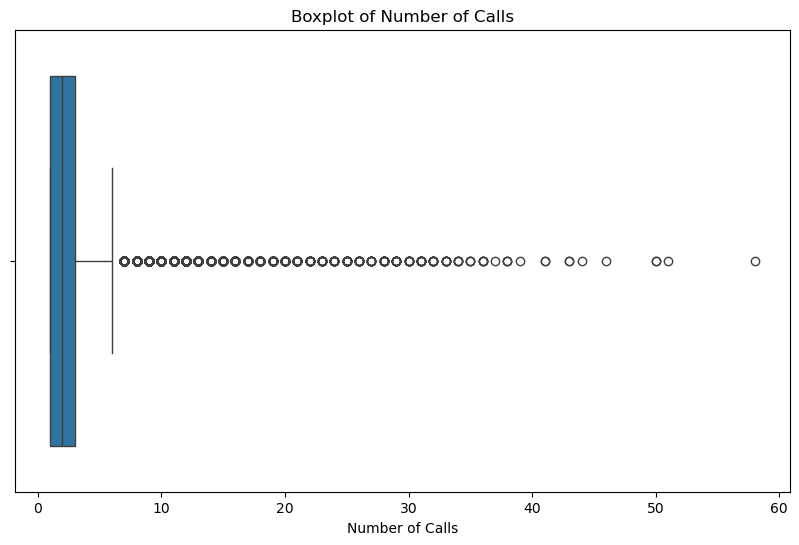

In [50]:
# Show the boxplot of dur
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_dt['num_calls'])
plt.title('Boxplot of Number of Calls')
plt.xlabel('Number of Calls')
plt.show()

In [51]:
# Calculate the IQR for age
Q1_cl = customer_dt['num_calls'].quantile(0.25)
Q3_cl = customer_dt['num_calls'].quantile(0.75)
IQR_cl = Q3_cl - Q1_cl

# Determine the lower and upper bounds for outliers
lower_bound_cl = Q1_cl - 1.5 * IQR_cl
upper_bound_cl = Q3_cl + 1.5 * IQR_cl

print(f"Lower Bound of num_calls column: {lower_bound_cl}")
print(f"Upper Bound of num_calls column: {upper_bound_cl}")

# Identify outliers
outliers_cl = customer_dt[(customer_dt['num_calls'] < lower_bound_cl) | (customer_dt['num_calls'] > upper_bound_cl)]


# Count the number of outliers
num_outliers_cl = outliers_cl.shape[0]
print(f"Number of outliers in the 'age' column: {num_outliers_cl}")

Lower Bound of num_calls column: -2.0
Upper Bound of num_calls column: 6.0
Number of outliers in the 'age' column: 2720


In [52]:
outliers_cl

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
758,59,services,married,secondary,unknown,6,may,250,7,unknown,no
780,30,admin.,married,secondary,unknown,7,may,172,8,unknown,no
906,27,services,single,secondary,unknown,7,may,388,7,unknown,no
1105,43,admin.,married,tertiary,unknown,7,may,244,7,unknown,no
1386,37,admin.,married,primary,unknown,8,may,161,8,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
44594,34,technician,single,tertiary,cellular,23,aug,220,16,other,no
44666,25,technician,single,secondary,cellular,2,sep,206,7,other,no
44680,27,self-employed,single,tertiary,telephone,3,sep,543,9,failure,no
44770,37,services,single,tertiary,cellular,13,sep,323,9,other,yes


In [53]:
customer_dt = customer_dt[(customer_dt['num_calls'] >= lower_bound_cl) & (customer_dt['num_calls'] <= upper_bound_cl)]


In [54]:
customer_dt.shape

(36940, 11)

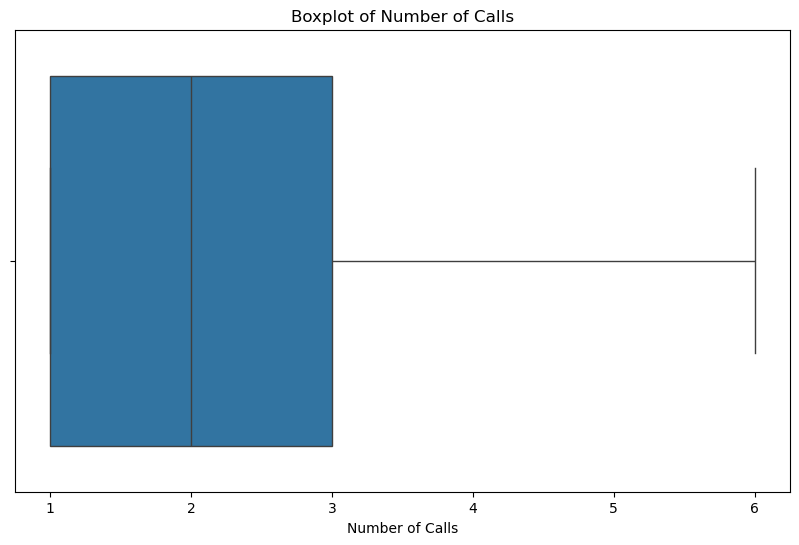

In [55]:
# Show the boxplot of dur
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_dt['num_calls'])
plt.title('Boxplot of Number of Calls')
plt.xlabel('Number of Calls')
plt.show()

## **EDA Exploratory data analysis**

### (1) Univariate Analysis

### **Distribution of Target Variable y**

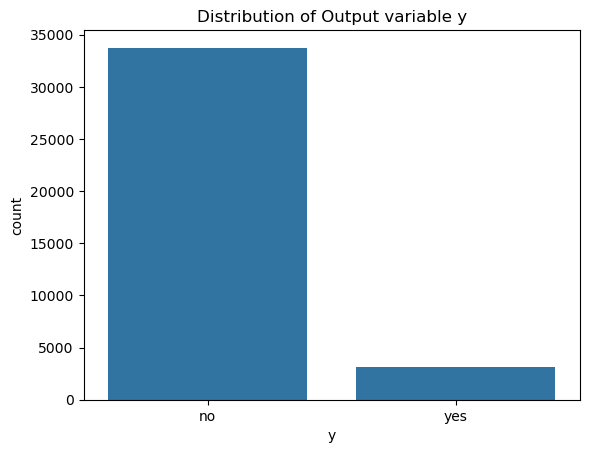

In [56]:
sns.countplot(x = 'y', data = customer_dt)
plt.title('Distribution of Output variable y')
plt.show()

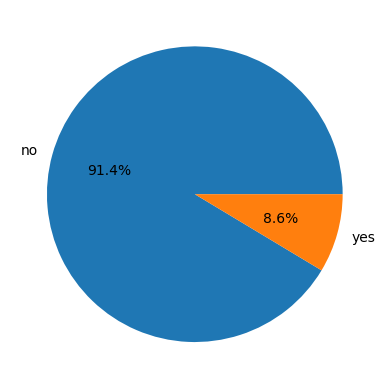

In [57]:
y = customer_dt['y'].value_counts() 
plt.pie(y.values, 
        labels=y.index, 
        autopct='%1.1f%%') 
plt.show()

### **Numerical Features Distribution**

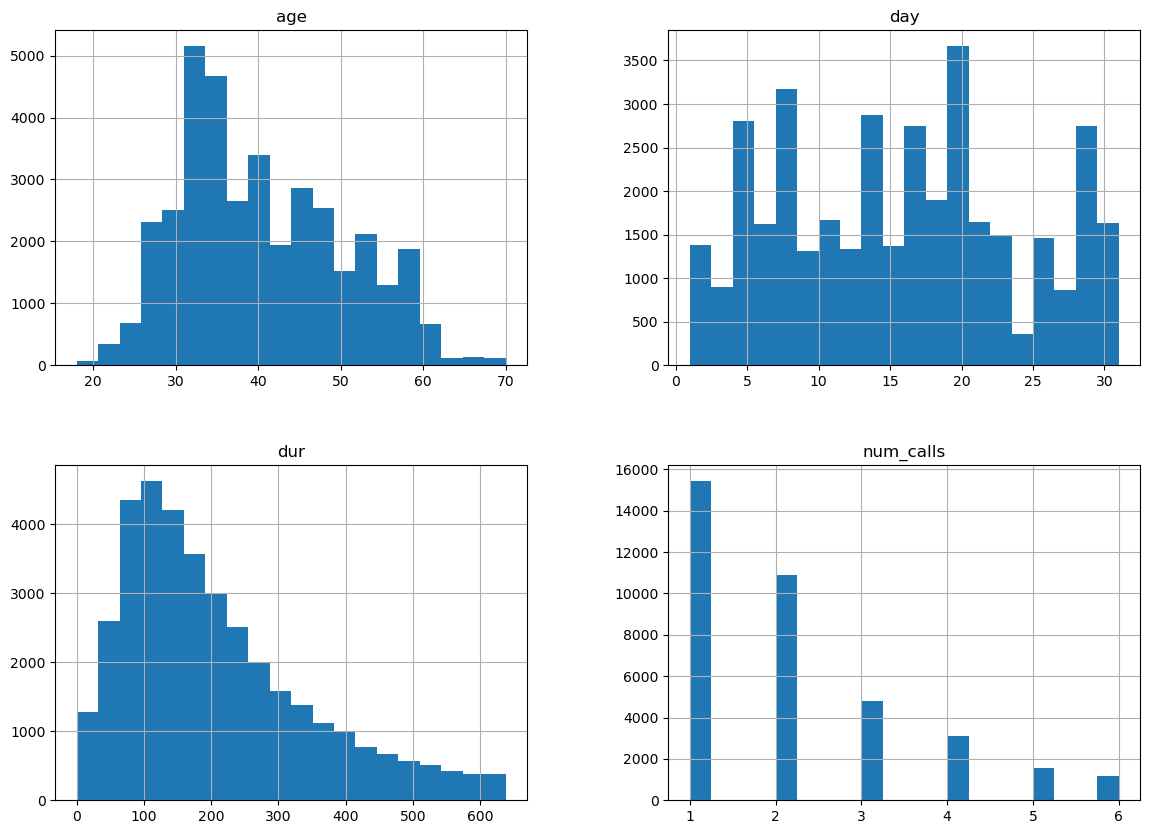

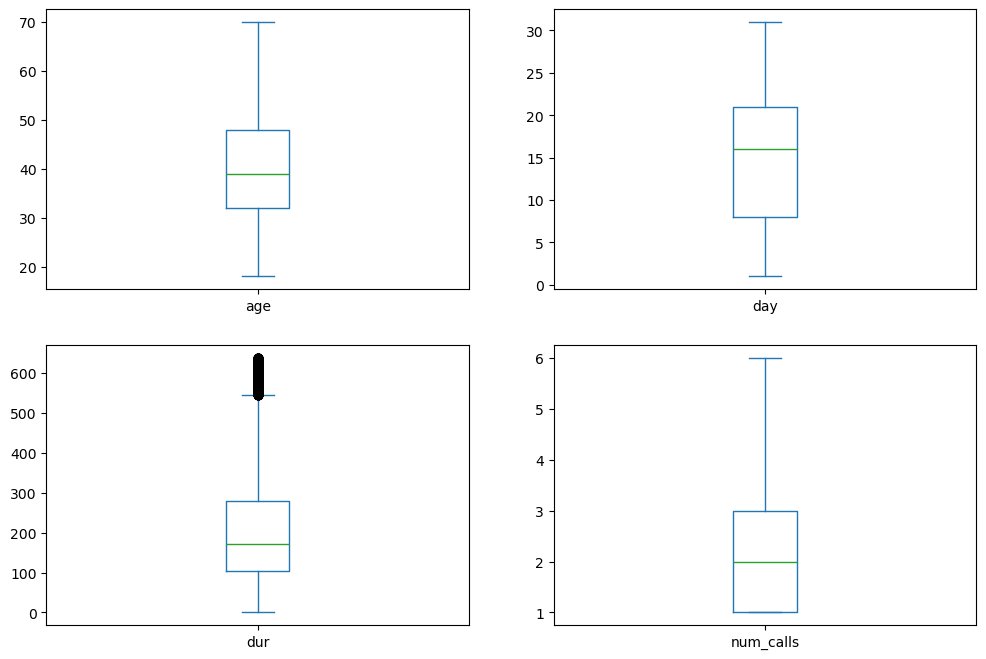

In [58]:
# Plot histograms for numerical features
customer_dt.hist(bins=20, figsize=(14,10))
plt.show()

# Boxplot for numerical features
customer_dt[['age', 'day', 'dur', 'num_calls']].plot(kind='box', subplots=True, layout=(2,2), figsize=(12,8))
plt.show()

### **Categorical features Distribution**

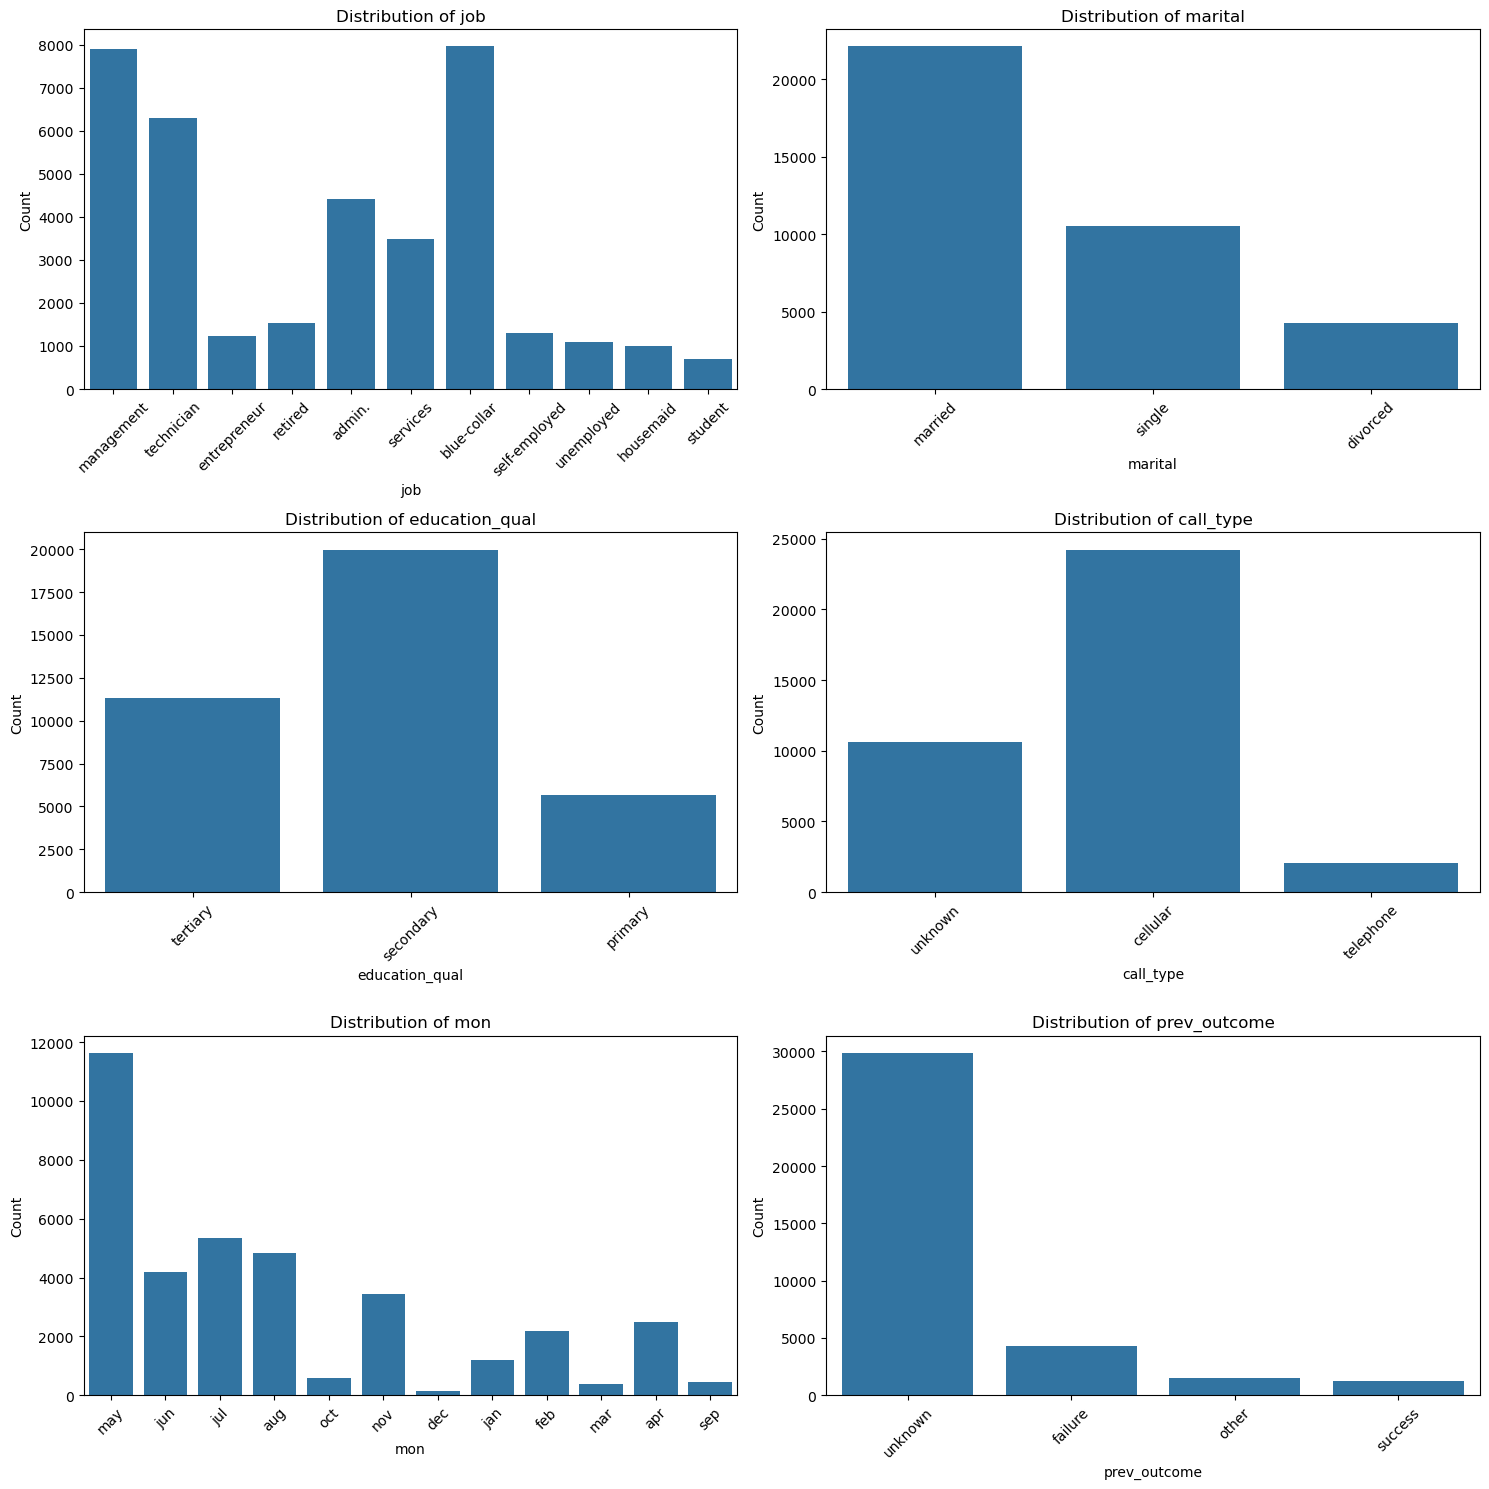

In [59]:

# List of categorical features
categorical_features = ['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome']

# Set up a 3x2 grid for plotting
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the categorical features and create count plots
for i, column in enumerate(categorical_features):
    sns.countplot(x=column, data=customer_dt, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### (2) Bivariate Analysis

### **Categorical features vs Target (Outcome)**

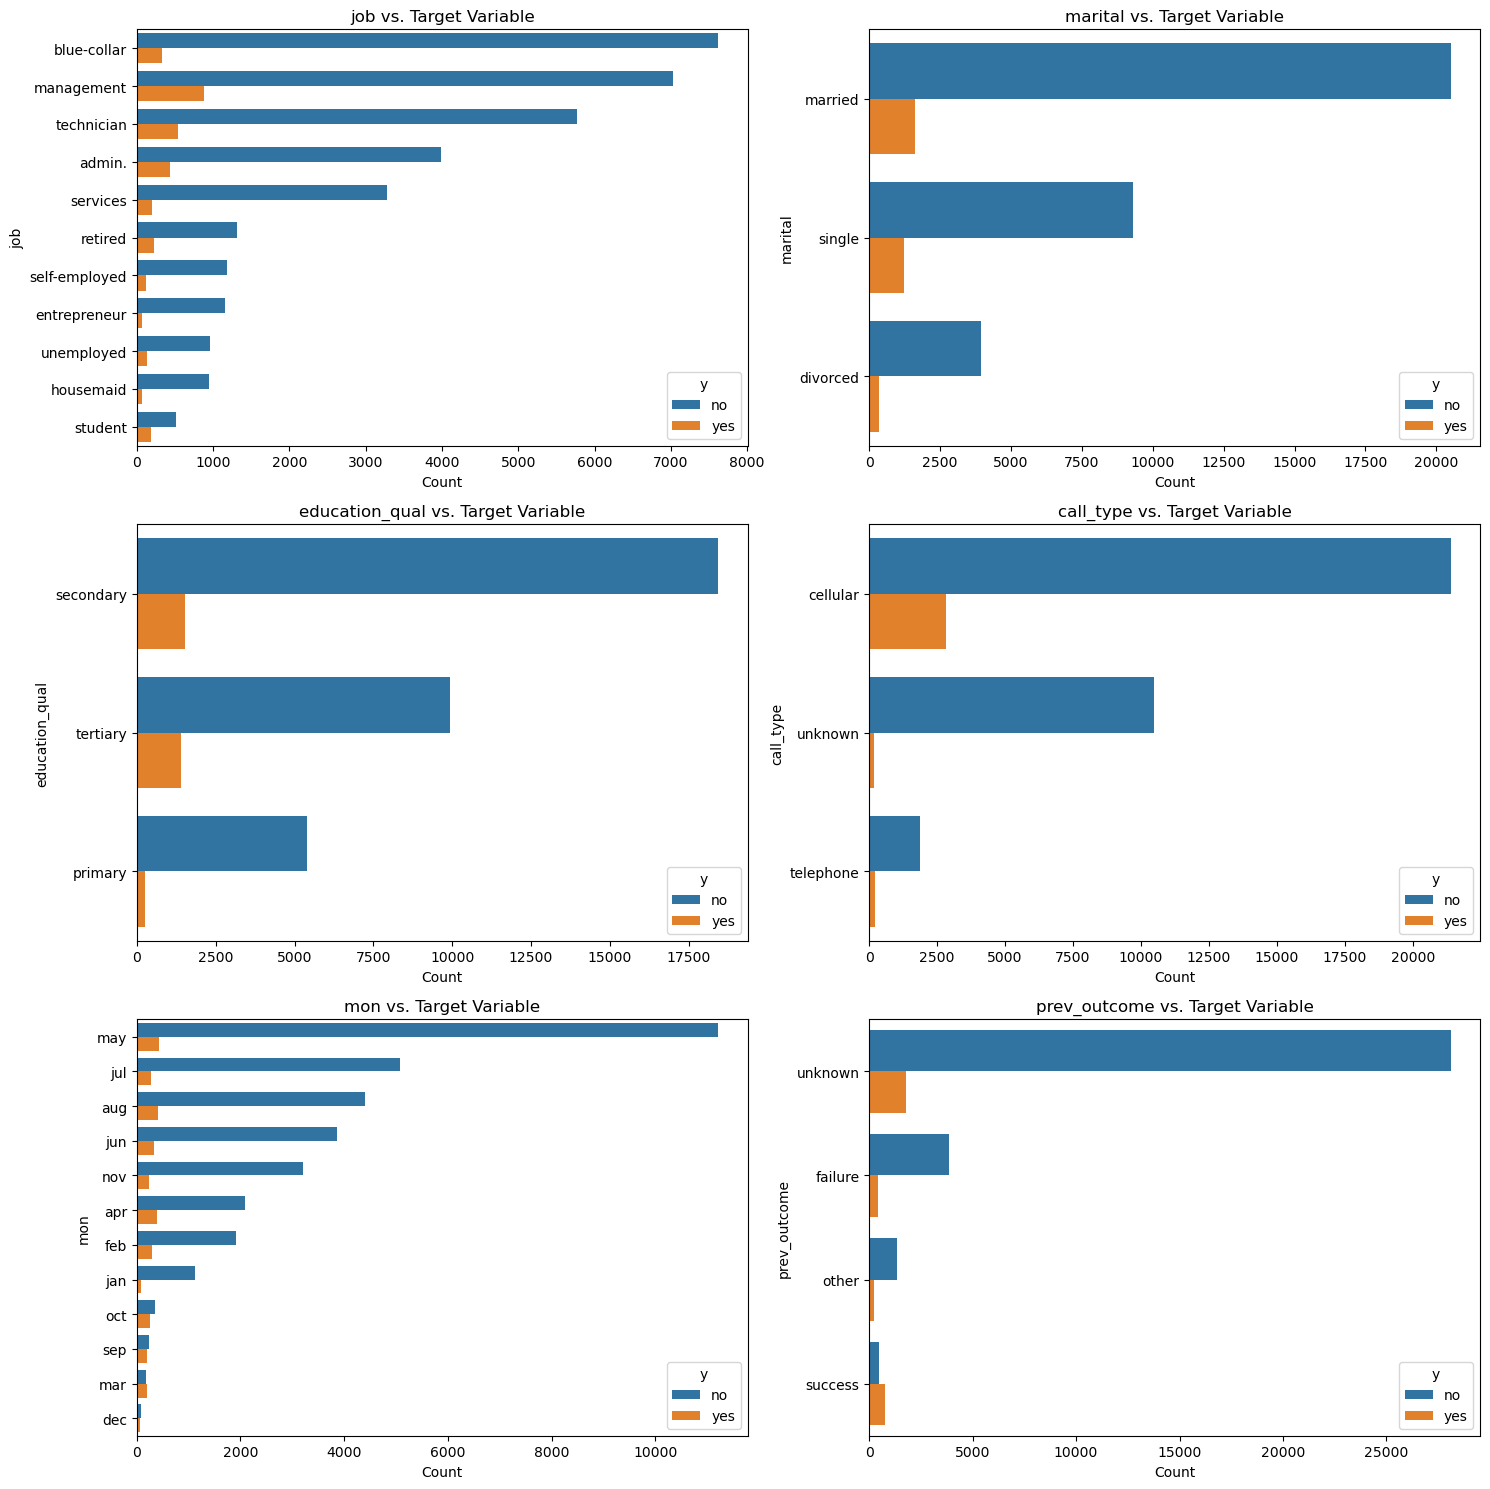

In [60]:
# List of categorical features to plot
categorical_features = ['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome']

# Set up a 3x2 grid for plotting
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the categorical features and create count plots
for i, column in enumerate(categorical_features):
    sns.countplot(y=column, hue='y', data=customer_dt, order=customer_dt[column].value_counts().index, ax=axes[i])
    axes[i].set_title(f'{column} vs. Target Variable')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(column)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### **Numeric features vs Target (Outcome)**

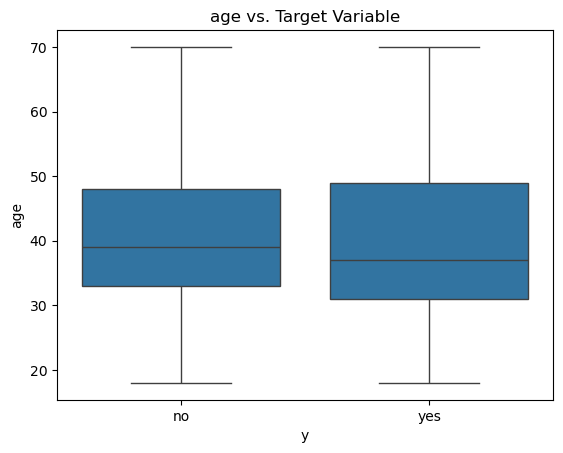

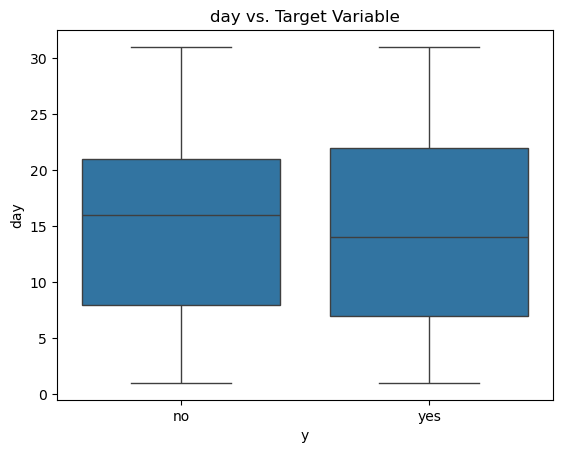

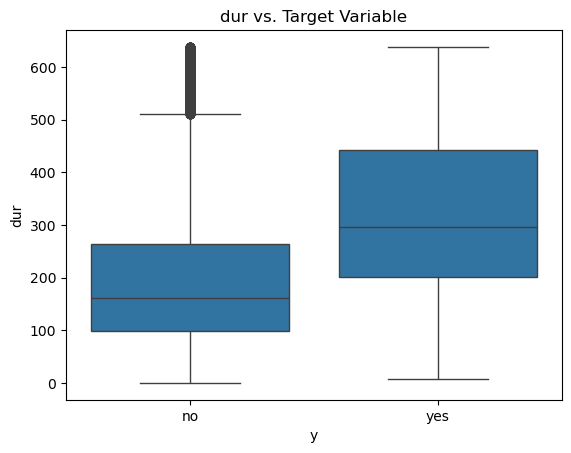

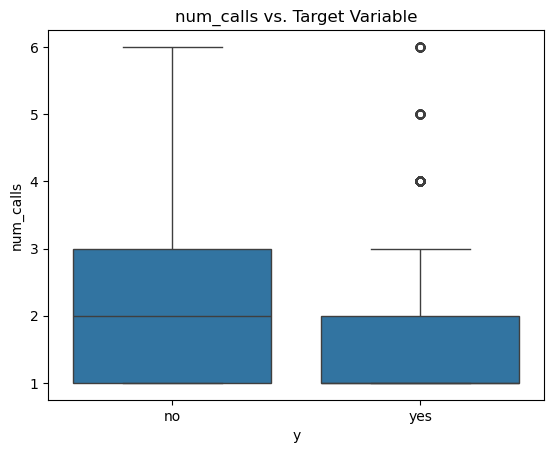

In [61]:
# Boxplot to see the relationship between numerical features and target variable
for column in ['age', 'day', 'dur', 'num_calls']:
    sns.boxplot(x='y', y=column, data=customer_dt)
    plt.title(f'{column} vs. Target Variable')
    plt.show()

### **Correlation Analysis**

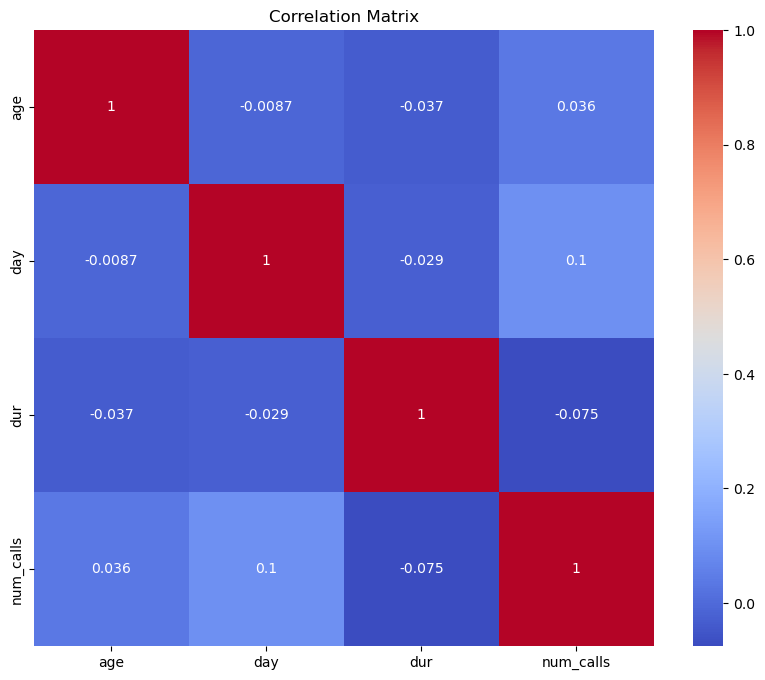

In [62]:
# Select only numeric columns
numeric_cols = customer_dt.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Encoding and Train test splitting 

In [63]:
# Label encode the targer variable Y

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
customer_dt['y'] = le.fit_transform(customer_dt['y'])

In [64]:
customer_dt['y']

0        0
1        0
2        0
5        0
6        0
        ..
45202    1
45203    1
45205    1
45209    0
45210    0
Name: y, Length: 36940, dtype: int32

In [65]:
X = customer_dt.drop(columns = ['y'])
y = customer_dt['y']

In [66]:
#Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [67]:
# List the columns that need to be transformed
ordinal_features = ['education_qual']
nominal_features = ['job', 'marital', 'call_type', 'mon', 'prev_outcome']


In [68]:
# Define the transformers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']]), ordinal_features),
        ('nom', OneHotEncoder(drop='first', sparse_output=False), nominal_features)
    ],
    remainder='passthrough'  # This will leave the numeric features as they are
)

In [69]:
# Apply the ColumnTransformer to the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [70]:
scaler = StandardScaler()

In [71]:
# Identify where numeric columns start after transformation
# The ordinal encoding adds 1 column, and one-hot encoding adds columns equal to the number of unique values in the nominal features minus one for each.
ordinal_columns = 1  # Only 1 ordinal feature 'education_qual'
onehot_columns = sum(len(preprocessor.transformers_[1][1].categories_[i]) - 1 for i in range(len(preprocessor.transformers_[1][1].categories_)))

num_start = ordinal_columns + onehot_columns

In [72]:
# Scale only the numeric features
X_train_scaled_numeric = scaler.fit_transform(X_train_processed[:, num_start:])
X_test_scaled_numeric = scaler.transform(X_test_processed[:, num_start:])

In [73]:
# Combine scaled numeric features with encoded categorical features
X_train_final = np.hstack((X_train_processed[:, :num_start], X_train_scaled_numeric))
X_test_final = np.hstack((X_test_processed[:, :num_start], X_test_scaled_numeric))

## **Apply Logistic Regression model**

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
# Step 6: Train the Logistic Regression model
modelLg = LogisticRegression()
modelLg.fit(X_train_final, y_train)

LogisticRegression()

In [76]:
# Predict on the test data
y_predLg = modelLg.predict(X_test_final)

In [77]:
#  Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_predLg)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.93


In [78]:
conf_matrix = confusion_matrix(y_test, y_predLg)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[6692   94]
 [ 441  161]]


In [79]:
class_report = classification_report(y_test, y_predLg)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      6786
           1       0.63      0.27      0.38       602

    accuracy                           0.93      7388
   macro avg       0.78      0.63      0.67      7388
weighted avg       0.91      0.93      0.91      7388



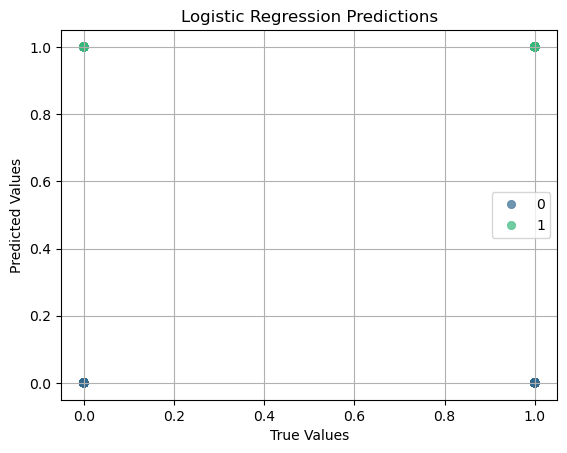

In [80]:
# Logistic Regression Predictions

sns.scatterplot(x=y_test, y=y_predLg, hue=y_predLg, palette='viridis', alpha=0.7, edgecolor=None)
plt.title('Logistic Regression Predictions')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)


## **Apply K-Nearest Neighbour (KNN)**

In [81]:
from sklearn.neighbors import KNeighborsClassifier

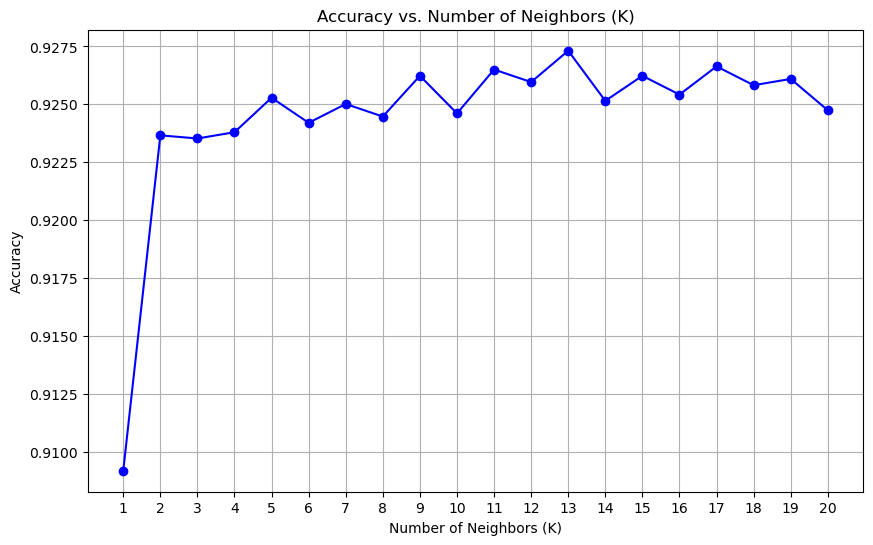

Best number of neighbors: 13
Best accuracy: 0.9273


In [82]:
# Initialize a list to store accuracy scores for each value of n_neighbors
accuracy_scores = []

# Manually try different values of n_neighbors
for k in range(1, 21):  # Trying values from 1 to 20
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_final, y_train)  # Train the model
    y_pred = knn_model.predict(X_test_final)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracy_scores.append(accuracy)  # Store the accuracy

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

# Identify the best k
best_k = accuracy_scores.index(max(accuracy_scores)) + 1
best_accuracy = max(accuracy_scores)

print(f'Best number of neighbors: {best_k}')
print(f'Best accuracy: {best_accuracy:.4f}')

## **Apply DecisionTreeClassifier**

In [83]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [84]:
# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred_tree = decision_tree_model.predict(X_test_final)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy of Decision Tree: {accuracy_tree:.4f}')


Accuracy of Decision Tree: 0.9004


In [85]:
# Create confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)


In [86]:
conf_matrix_tree

array([[6386,  400],
       [ 336,  266]], dtype=int64)

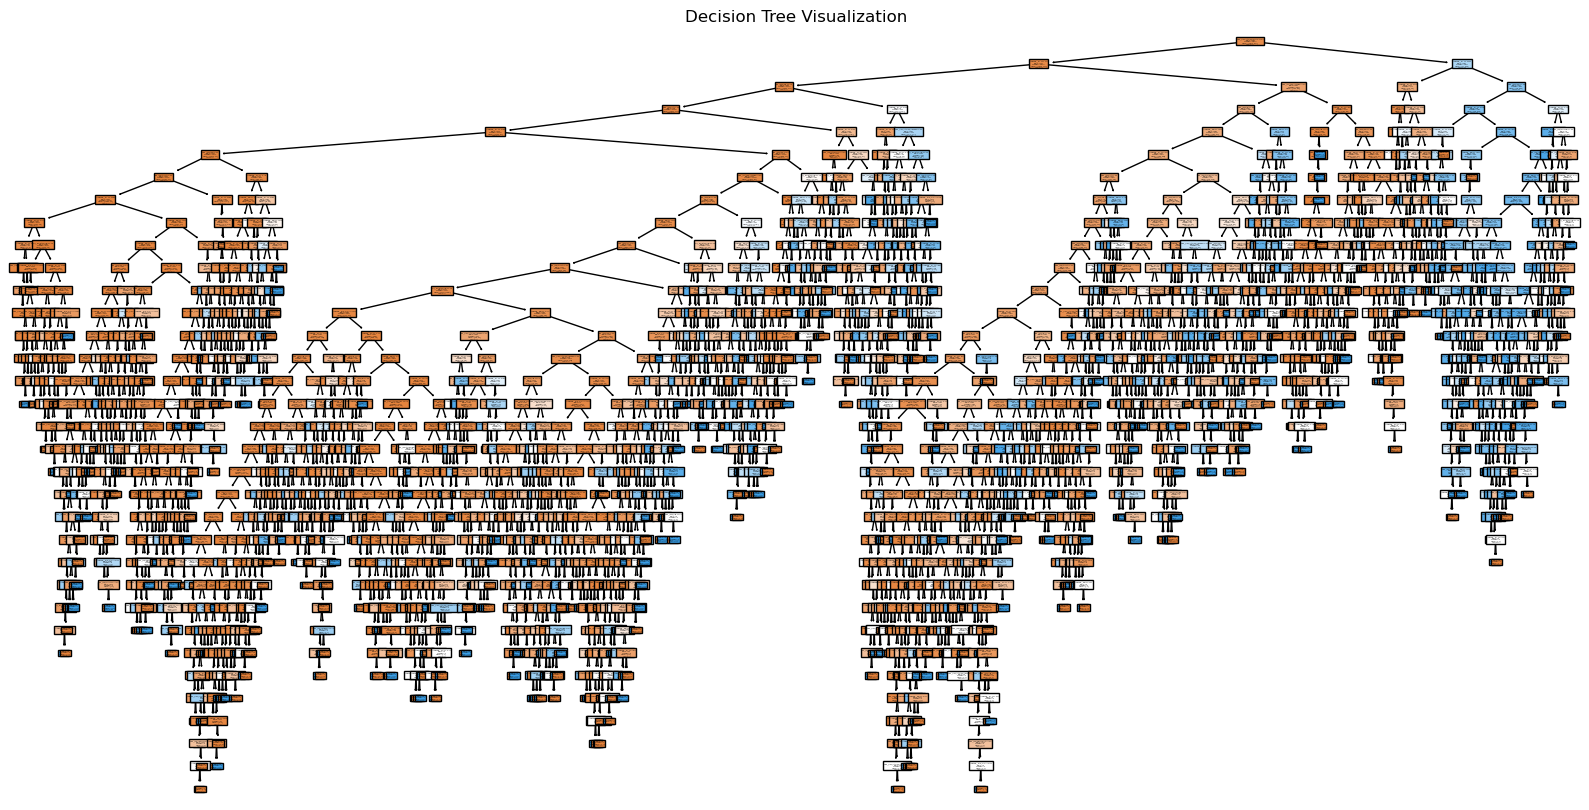

In [87]:
# Plot decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, feature_names=preprocessor.get_feature_names_out(), class_names=['no', 'yes'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

## **Apply XG Boost**

In [94]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss',  random_state=42)
xgb_model.fit(X_train_final, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_final)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy of XGBoost: {accuracy_xgb:.4f}')

Accuracy of XGBoost: 0.9285


<Figure size 1200x800 with 0 Axes>

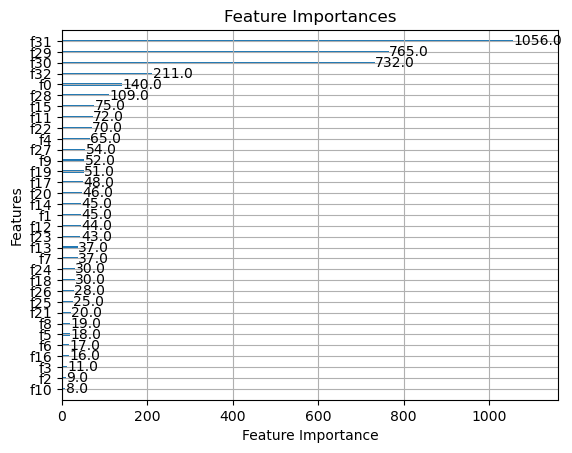

In [ ]:
# Plot feature importances
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_model, importance_type='weight', title='Feature Importances', xlabel='Feature Importance', ylabel='Features')
plt.show()

## **Apply Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test_final)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest: {accuracy_rf:.4f}')

Accuracy of Random Forest: 0.9327


## **Now Compare all 5 Models**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Evaluate models
metrics = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_predLg),
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
    ],
    'Precision': [
        precision_score(y_test, y_predLg, pos_label= 1),
        precision_score(y_test, y_pred, pos_label=1),
        precision_score(y_test, y_pred_tree, pos_label=1),
        precision_score(y_test, y_pred_rf, pos_label=1),
        precision_score(y_test, y_pred_xgb, pos_label=1),
    ],
    'Recall': [
        recall_score(y_test, y_predLg, pos_label=1),
        recall_score(y_test, y_pred, pos_label=1),
        recall_score(y_test, y_pred_tree, pos_label=1),
        recall_score(y_test, y_pred_rf, pos_label=1),
        recall_score(y_test, y_pred_xgb, pos_label=1),
    ],
    'F1 Score': [
        f1_score(y_test, y_predLg, pos_label=1),
        f1_score(y_test, y_pred, pos_label=1),
        f1_score(y_test, y_pred_tree, pos_label=1),
        f1_score(y_test, y_pred_rf, pos_label=1),
        f1_score(y_test, y_pred_xgb, pos_label=1),
    ]
}


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.927585   0.631373  0.267442  0.375729
1                  KNN  0.924743   0.755556  0.112957  0.196532
2        Decision Tree  0.900379   0.399399  0.441860  0.419558
3        Random Forest  0.932729   0.673267  0.338870  0.450829
4              XGBoost  0.928533   0.586449  0.416944  0.487379


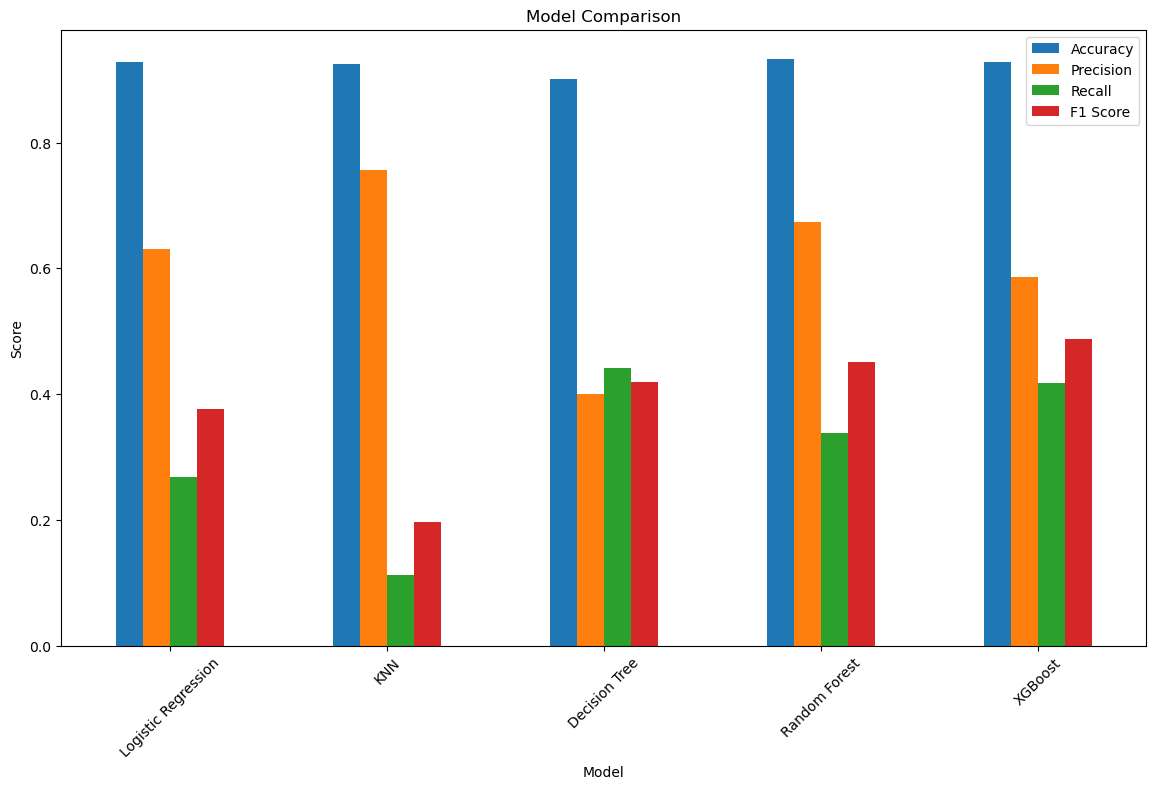

In [ ]:

# Create DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)

# Display metrics
print(metrics_df)

# Plot metrics for comparison
metrics_df.set_index('Model').plot(kind='bar', figsize=(14, 8))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()